# Libraries Demo

##  `autodiff.forward`

### Univariate Functions

The standard workflow for `autodiff` is to first initiate a `Variable`, or several `Variable`s. We then use these `Variable` to construct `Expression`s, which can then be queried for values and derivatives.

In [65]:
import numpy              as np
import matplotlib.pyplot  as plt
from mpl_toolkits.mplot3d import Axes3D
from autodiff.forward     import *

Suppose we want to calculate the derivatives of $f(x) = \cos(\pi x)\exp(-x^2)$. We can start with creating a `Variable` called x.

In [66]:
x = Variable()

We then create the `Expression` for $f(x)$. Note that here `cos` and `exp` are library functions from `autrodiff`.

In [67]:
f = cos(np.pi*x)*exp(-x**2)

We can then evaluate $f(x)$'s value and derivative by calling the `evaluation_at` method and the `derivative_at` method. For `derivative_at` method, the first argument specifies which variable to take derivative with respect to, the second argument specifies which point in the domain are the derivative to be calculated.

In [68]:
f.evaluation_at({x: 1})

-0.36787944117144233

In [69]:
f.derivative_at(x, {x: 1})

0.73575888234288456

The `derivative_at` method supports second order derivative. If we want to calculate $\dfrac{d^2 f}{d x^2}$, we can add another argument `order=2`.

In [70]:
f.derivative_at(x, {x: 1}, order=2)

2.8950656693130772

Both the methods `evaluation_at` and `derivative_at` are vectorized, and instead of pass in a scalar value, we can pass in a `numpy.array`, and the output will be `f`'s value / derivative at all entried of the input. For example, we can calculate the value, first order derivative and second order derivative of $f(x)$ on the interval $[-2, 2]$ simply by

In [71]:
interval = np.linspace(-2, 2, 200)
values = f.evaluation_at(   {x: interval})
der1st = f.derivative_at(x, {x: interval})  
der2nd = f.derivative_at(x, {x: interval}, order=2)

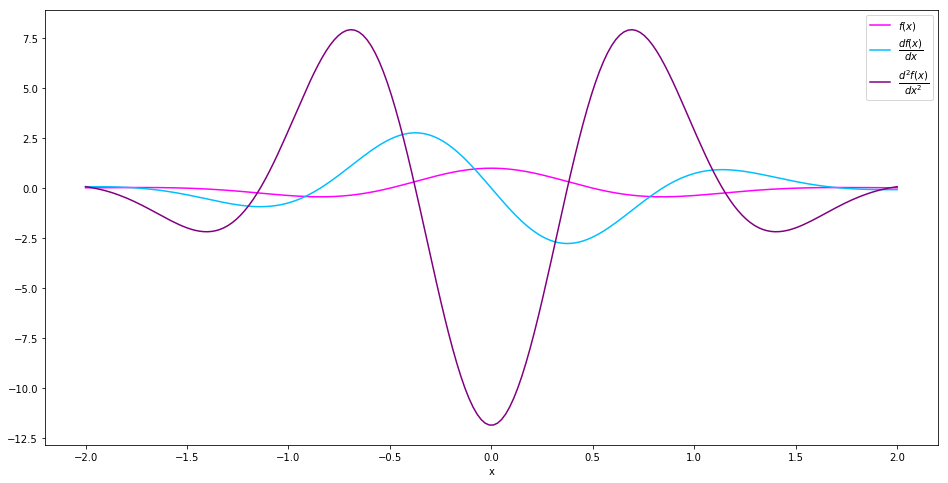

In [72]:
fig  = plt.figure(figsize=(16, 8))
plt.plot(interval, values, c='magenta',     label='$f(x)$')
plt.plot(interval, der1st, c='deepskyblue', label='$\dfrac{df(x)}{dx}$')
plt.plot(interval, der2nd, c='purple',      label='$\dfrac{d^2f(x)}{dx^2}$')
plt.xlabel('x')
plt.legend()
plt.show()

### Multivariate Functions

The workflow with multivariate functions are essentially the same.

Suppose we want to calculate the derivatives of $g(x, y) = \cos(\pi x)\cos(\pi y)\exp(-x^2-y^2)$. We can start with adding another `Variable` called y.

In [73]:
y = Variable()

We then create the `Expression` for $g(x, y)$.

In [74]:
g = cos(np.pi*x) * cos(np.pi*y) * exp(-x**2-y**2)

We can then evaluate $f(x)$'s value and derivative by calling the `evaluation_at` method and the `derivative_at` method, as usual.

In [75]:
g.evaluation_at({x: 1.0, y: 1.0})

0.1353352832366127

In [76]:
g.derivative_at(x, {x: 1.0, y: 1.0})

-0.27067056647322535

In [77]:
g.derivative_at(x, {x: 1.0, y: 1.0})

-0.27067056647322535

Now we have two variables, we may want to calculate $\dfrac{\partial^2 g}{\partial x \partial y}$. We can just replace the first argument of `derivative_at` to a tuple `(x, y)`. In this case the third argument `order=2` can be omitted, because the `Expression` can infer from the first argument that we are looking for a second order derivative.

In [78]:
g.derivative_at((x, y), {x: 1.0, y: 1.0})

0.54134113294645059

We can also ask `g` for its Hessian matrix. A `numpy.array` will be returned.

In [79]:
g.hessian_at({x: 1.0, y:1.0})

array([[-1.06503514,  0.54134113],
       [ 0.54134113, -1.06503514]])

Since the `evaluation_at` method and `derivarive_at` method are vectorized, we can as well pass in a mesh grid, and the output will be a grid of the same shape. For example, we can calculate the value, first order derivative and second order derivative of  f(x)f(x)  on the interval  $x\in[−2,2], y\in[-2,2]$  simply by

In [80]:
us, vs = np.linspace(-2, 2, 200), np.linspace(-2, 2, 200)
uu, vv = np.meshgrid(us, vs)

In [81]:
values = g.evaluation_at(        {x: uu, y:vv})
der1st = g.derivative_at(x,      {x: uu, y:vv})  
der2nd = g.derivative_at((x, y), {x: uu, y:vv})

Let's see what they look like.

In [82]:
def plt_surf(uu, vv, zz):
    fig  = plt.figure(figsize=(16, 8))
    ax   = Axes3D(fig)
    surf = ax.plot_surface(uu, vv, zz, rstride=2, cstride=2, alpha=0.8, cmap='cool')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_proj_type('ortho')
    plt.show()

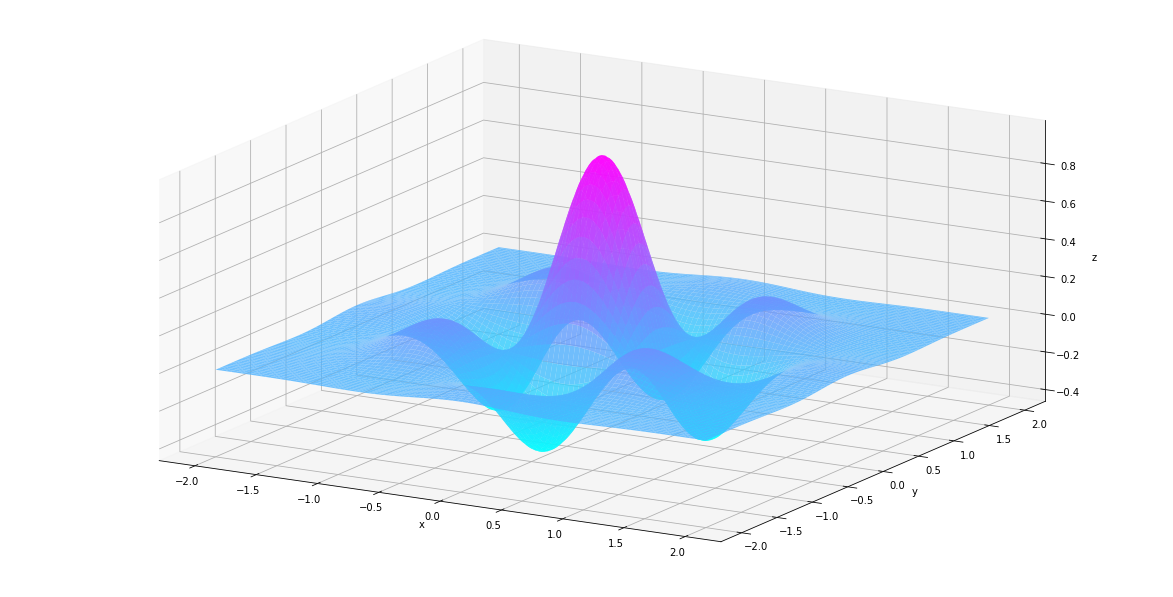

In [83]:
plt_surf(uu, vv, values)

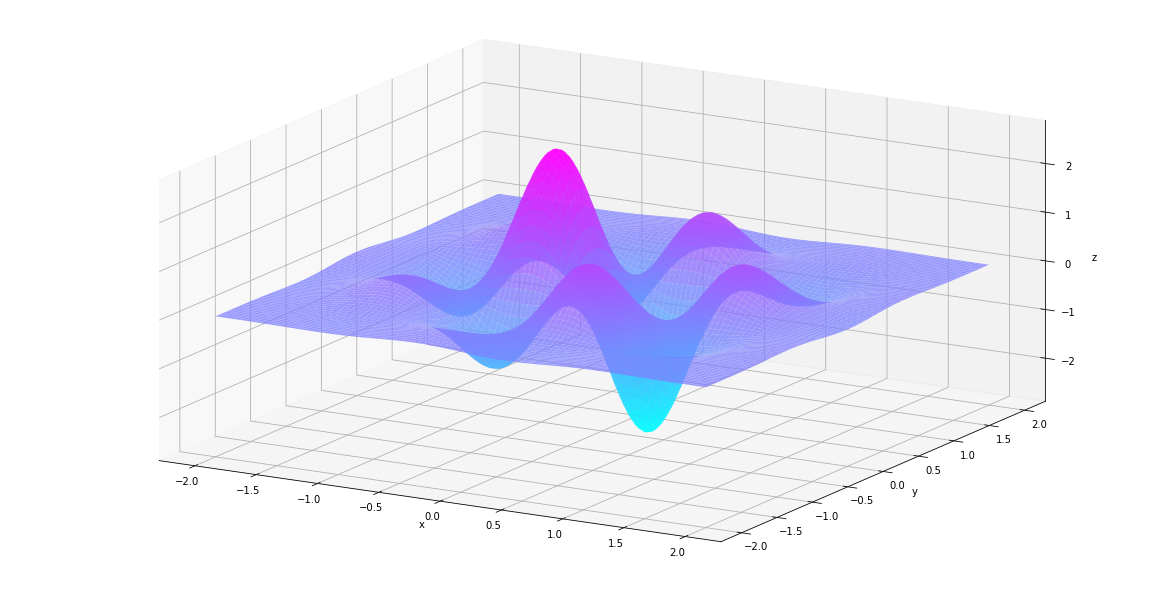

In [84]:
plt_surf(uu, vv, der1st)

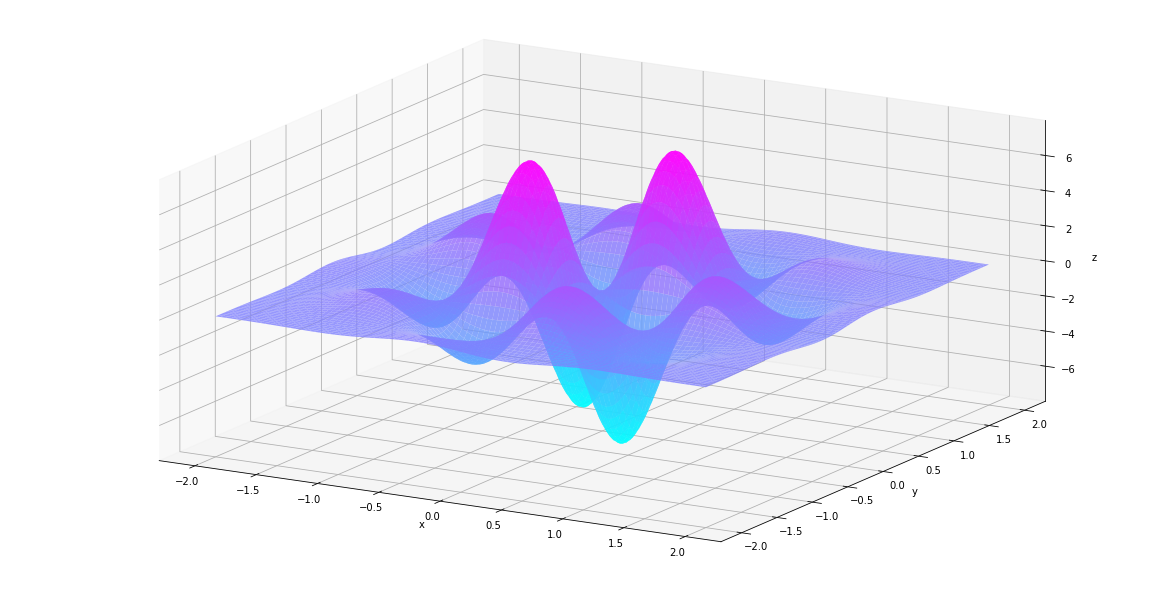

In [85]:
plt_surf(uu, vv, der2nd)

### Vector Functions

Functions defined on $\mathbb{R}^n \mapsto \mathbb{R}^m$ are also supported. Here we create an `VectorFunction` that represents $h(\begin{bmatrix}x\\y\end{bmatrix}) = \begin{bmatrix}f(x)\\g(x, y)\end{bmatrix}$.

In [86]:
h = VectorFunction(exprlist=[f, g])

We can then evaluates $h(\begin{bmatrix}x\\y\end{bmatrix})$'s value and gradient ($\begin{bmatrix}\dfrac{\partial f}{\partial x}\\\dfrac{\partial g}{\partial x}\end{bmatrix}$ and $\begin{bmatrix}\dfrac{\partial f}{\partial y}\\\dfrac{\partial g}{\partial y}\end{bmatrix}$) by calling its `evaluation_at` method and `gradient_at` method. The `jacobian_at` function returns the Jacobian matrix ($\begin{bmatrix}\dfrac{\partial f}{\partial x} & \dfrac{\partial f}{\partial y} \\ \dfrac{\partial g}{\partial x} & \dfrac{\partial g}{\partial y} \end{bmatrix}$).

In [87]:
h.evaluation_at({x: 1.0, y: -1.0})

array([-0.36787944,  0.13533528])

In [88]:
h.gradient_at(0, {x: 1.0, y: -1.0})

array([ 0.,  0.])

In [89]:
h.jacobian_at({x: 1.0, y: -1.0})

array([[ 0.73575888,  0.        ],
       [-0.27067057,  0.27067057]])

## `autodiff.rootfinding`

Rootfinding module provides function `newton_scalar` to find the root of a given function with arbitrarily many variables. It also works with back propagation mode. Here for visualization purpose we only show up to 2 variables.

Example1:
try to approximate: 
$f=sin(x)-0.4x = 0$ from $x = -2.5,y = -1.5$

In [90]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from autodiff.forward import *
from autodiff.rootfinding import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot  as plt

In [91]:
x = Variable()
f = x**2-4*x
result_d = newton_scalar(f,{x:1},max_itr=100)

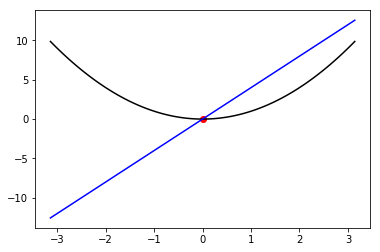

In [92]:
xx= np.linspace(-np.pi,np.pi,100)
plt.plot(xx,xx**2,color = 'black')
plt.plot(xx,4*xx,color = 'blue')
plt.scatter([result_d[x]],[f.evaluation_at({x:result_d[x]})],color = 'red')

Example 2:
$f(x,y) = x^2-xy = 0$ from $x=1$, and $y=10$

In [93]:
x, y = Variable(), Variable()
f = x**2-x*y
result_d = newton_scalar(f,{x:1,y:10},max_itr = 100)

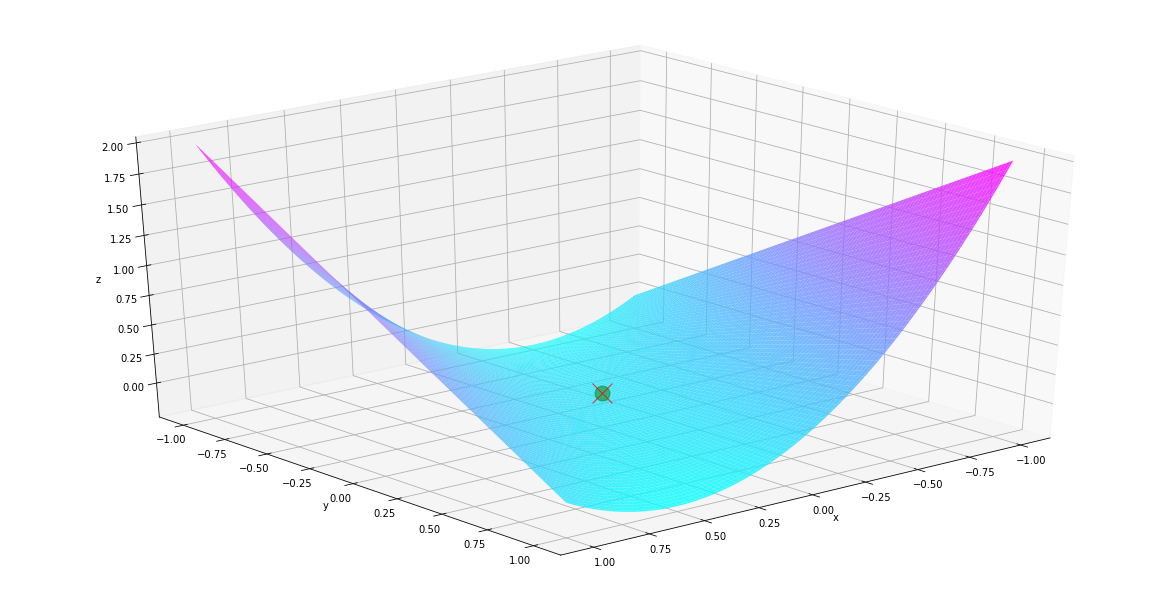

In [94]:
fig  = plt.figure(figsize=(16, 8))  
ax   = Axes3D(fig) 
us, vs = np.linspace(-1, 1, 200), np.linspace(-1, 1, 200)
uu, vv = np.meshgrid(us, vs)
zz = f.evaluation_at({x: uu, y:vv})
ax.plot([0], [0], [0], marker='o', markersize=15, c='green',alpha = .5)
surf = ax.plot_surface(uu, vv, zz, rstride=2, cstride=2, alpha=0.8, cmap='cool')
ax.plot([result_d[x]], [result_d[y]], 
    [f.evaluation_at({x:result_d[x],y:result_d[y]})], 
    marker='x', markersize=20, c='red',alpha = .8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 50)
plt.show()

## `autodiff.optimize`

In [95]:
import numpy              as np
from   autodiff.forward   import *
import autodiff.optimize  as opt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot  as plt
%matplotlib inline

We included several basic optimization routines built on `autodiff.forward`. Here we'll use the Rosenbrock function to demonstrate the use of these optimization routines. The Rosenbrock function is defined as $f(x, y) = (a-x)^2 + b(y-x^2)^2$. Here we use $a=1, b=100$.

In [96]:
x, y = Variable(), Variable()
f = (1-x)**2 + 100*(y-x**2)**2

In [97]:
us, vs = np.linspace(-2, 1.5, 200), np.linspace(0.0, 3.5, 200)
uu, vv = np.meshgrid(us, vs)
values = f.evaluation_at({x: uu, y:vv})

The landscape of the function looks like below. The global minimum is at $[-1, 1]$, it is marked by the red star.

In [98]:
def plt_surf(uu, vv, zz, traj=None, show_dest=False, show_traj=False):
    fig  = plt.figure(figsize=(16, 8))
    ax   = Axes3D(fig)  
    if show_traj: ax.plot(traj[0], traj[1], traj[2], marker='>', markersize=7, c='orange')
    if show_dest: ax.plot([1.0], [1.0], [0.0], marker='*', markersize=15, c='red')
    surf = ax.plot_surface(uu, vv, zz, rstride=2, cstride=2, alpha=0.8, cmap='cool')  
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_proj_type('ortho')
    plt.show()

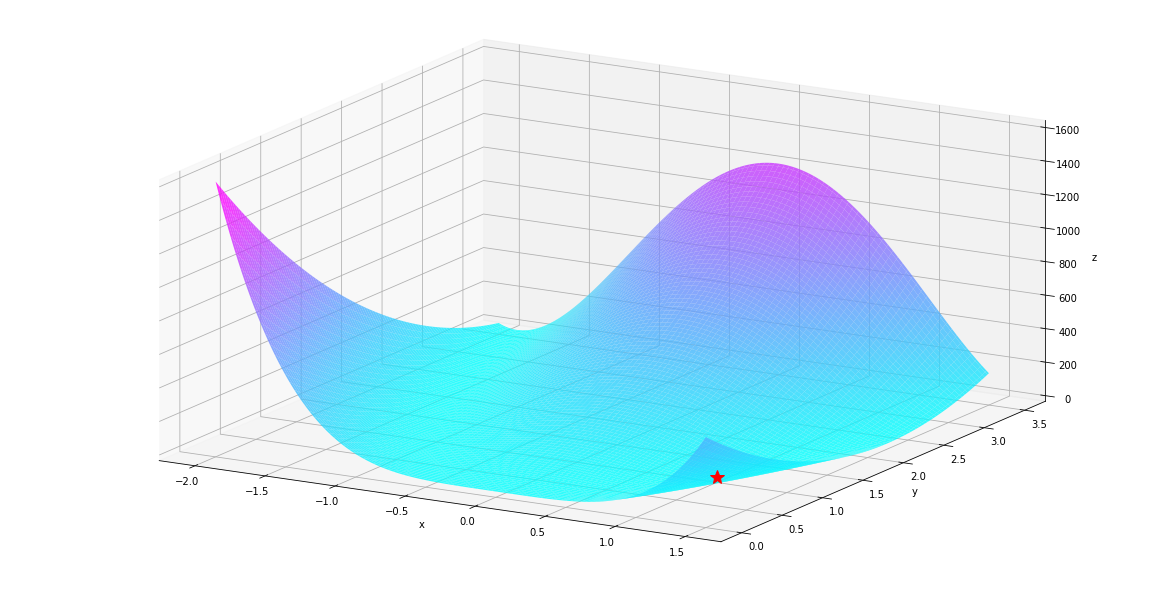

In [99]:
plt_surf(uu, vv, values, show_dest=True)

### `autodiff.optimize.gradient_descent`

Let's say we start from $(0.0, 3.0)$. We'll first use gradient descent to find the miminum. The gradient descent is implemented in `autodiff.optimize.gradient_descent`. Here we set the argument `return_history=True` to return a whole history of optimization.

In [100]:
hist = opt.gradient_descent(f, init_val_dict={x: 0.0, y: 3.0}, max_iter=10000, 
                            return_history=True)

We can plot our optimization path as below. We can see that gradient descent approaches the minimum slowly because the gradient around the minimum is small.

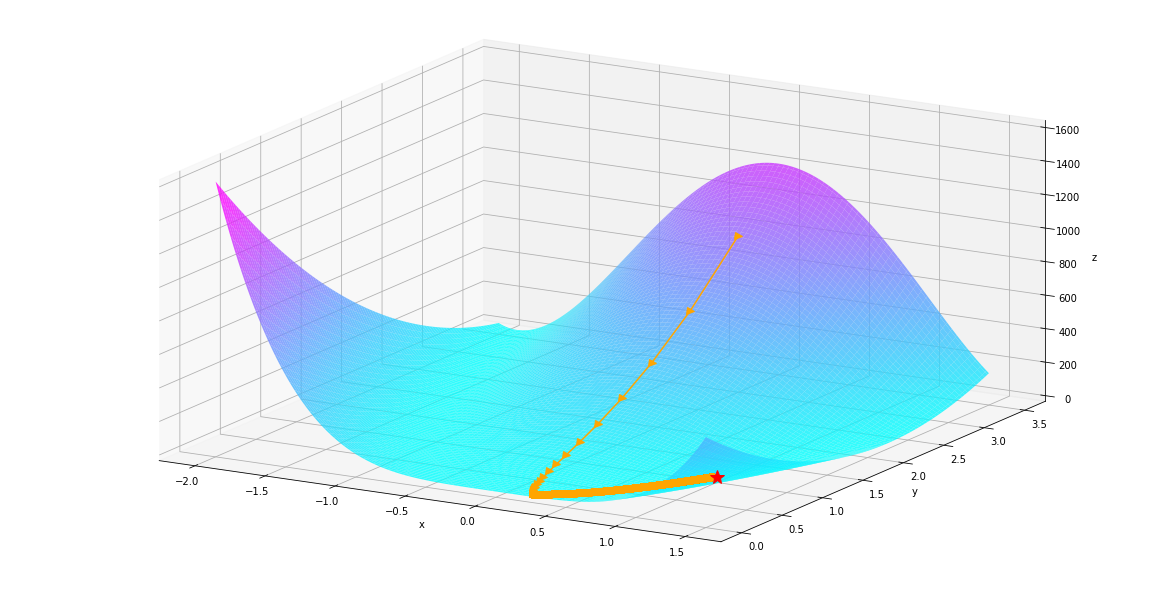

In [101]:
hist = np.array(hist)
us, vs = hist[:, 0].flatten(), hist[:, 1].flatten()
zs     = f.evaluation_at({x: us, y: vs})
plt_surf(uu, vv, values, (us, vs, zs), show_dest=True, show_traj=True)

### `autodiff.optimize.newton`

We'll then use Newton's method to find the miminum. The Newton's method is implemented in `autodiff.optimize.newton`. Here we set the argument `return_history=True` to return a whole history of optimization.

In [102]:
hist = opt.newton(f, init_val_dict={x: 0.0, y: 3.0}, max_iter=10000, 
                  return_history=True)

We can plot our optimization path as below. The Newton's method makes use of second-derivative information. We can see that the Newton's method takes much fewer steps to reach the minimum.

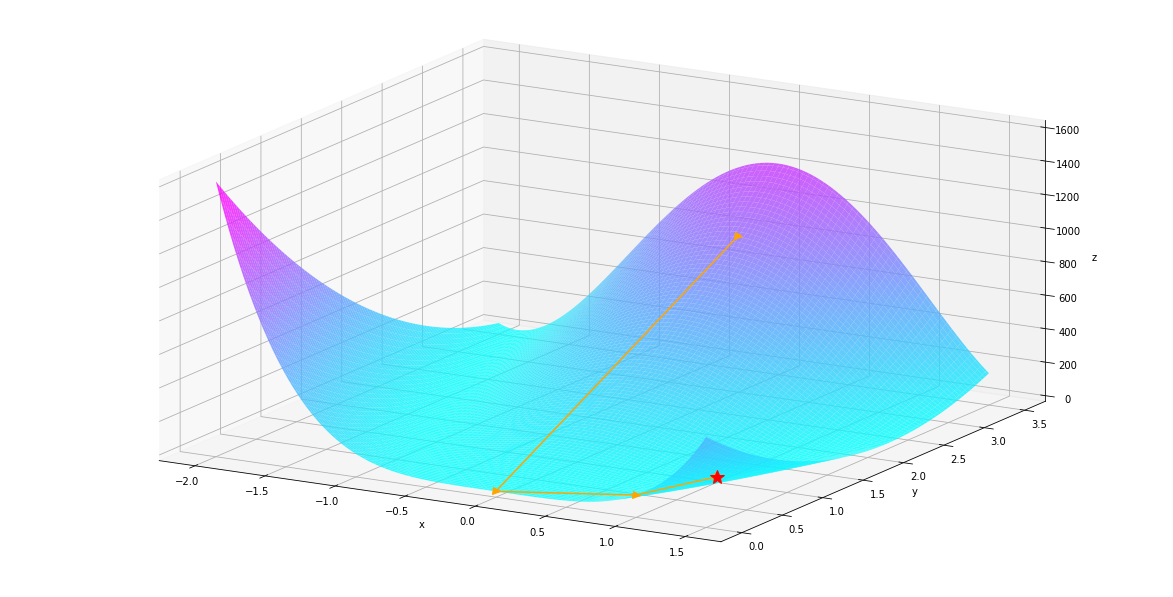

In [103]:
hist = np.array(hist)
us, vs = hist[:, 0].flatten(), hist[:, 1].flatten()
zs     = f.evaluation_at({x: us, y: vs})
plt_surf(uu, vv, values, (us, vs, zs), show_dest=True, show_traj=True)

### `autodiff.optimize.gradient_descent`


Now let's look at the gradient_descent method, unlike Newton's method, one does not need the Hessian matrix to find the minimum, while the trade off is that the algorithm might stuck in local minimum and takes more iteration. 

In [104]:
hist = opt.gradient_descent(f, init_val_dict={x: 0.0, y: 3.0}, max_iter=10000, 
                  return_history=True)

We see gradient descent took a lot more steps then newton's method. 

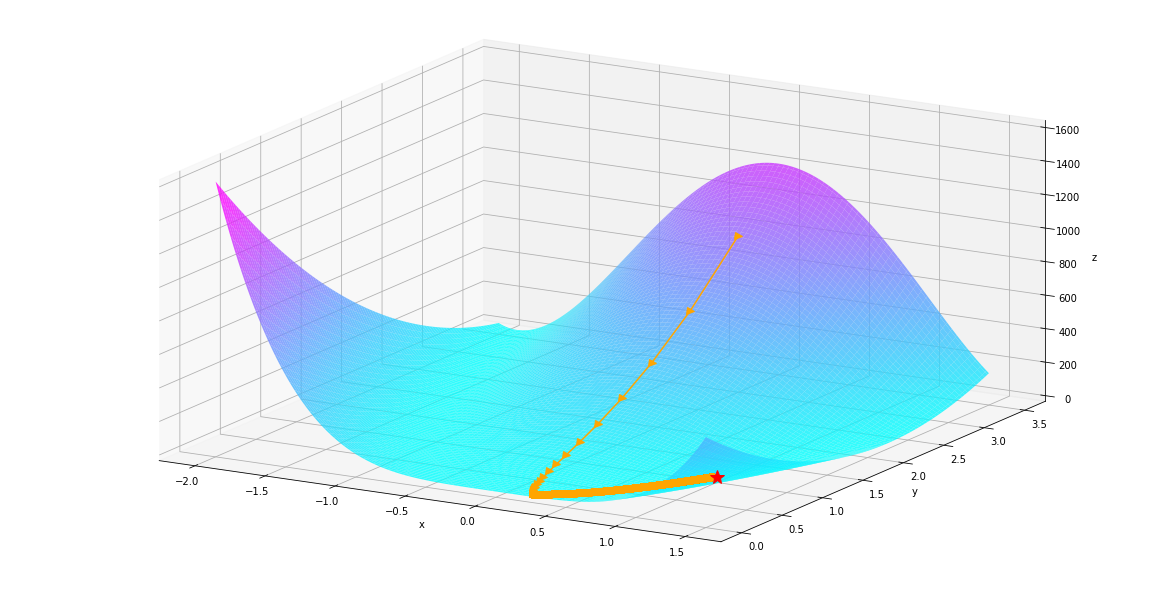

In [105]:
hist = np.array(hist)
us, vs = hist[:, 0].flatten(), hist[:, 1].flatten()
zs     = f.evaluation_at({x: us, y: vs})
plt_surf(uu, vv, values, (us, vs, zs), show_dest=True, show_traj=True)

### `autodiff.optimize.bfgs`

Lastly, we'll use BFGS to find the miminum. BFGS is a quasi-Newton method that approximates the Hessian matrix while doing the optimization. The optimization path of BFGS can be quite hysterical, so we'll just show the optimization result. It is $[1.0, 1.0]$ as we expected.

In [106]:
res = opt.bfgs(f, init_val_dict={x: 0.0, y: 3.0})

In [107]:
print(res[x], res[y])

1.00000000001 1.00000000001


Let's look at the plot for bfgs, we see it blows up before it get to the mininum

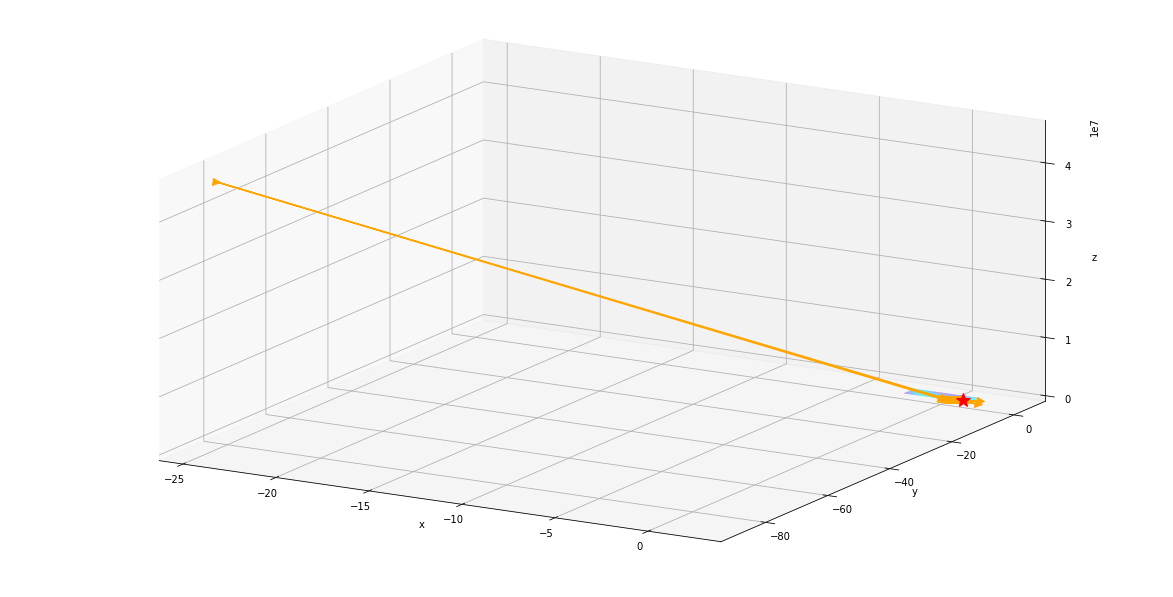

In [108]:
hist = opt.bfgs(f, init_val_dict={x: 0.0, y: 0.0}, max_iter=10000, 
                  return_history=True)
hist = np.array(hist)
us, vs = hist[:, 0].flatten(), hist[:, 1].flatten()
zs     = f.evaluation_at({x: us, y: vs})
plt_surf(uu, vv, values, (us, vs, zs), show_dest=True, show_traj=True)

Let take a closer look by excluding the very large value in the first few iterations

In [109]:
hist_trim = hist[5:,:]

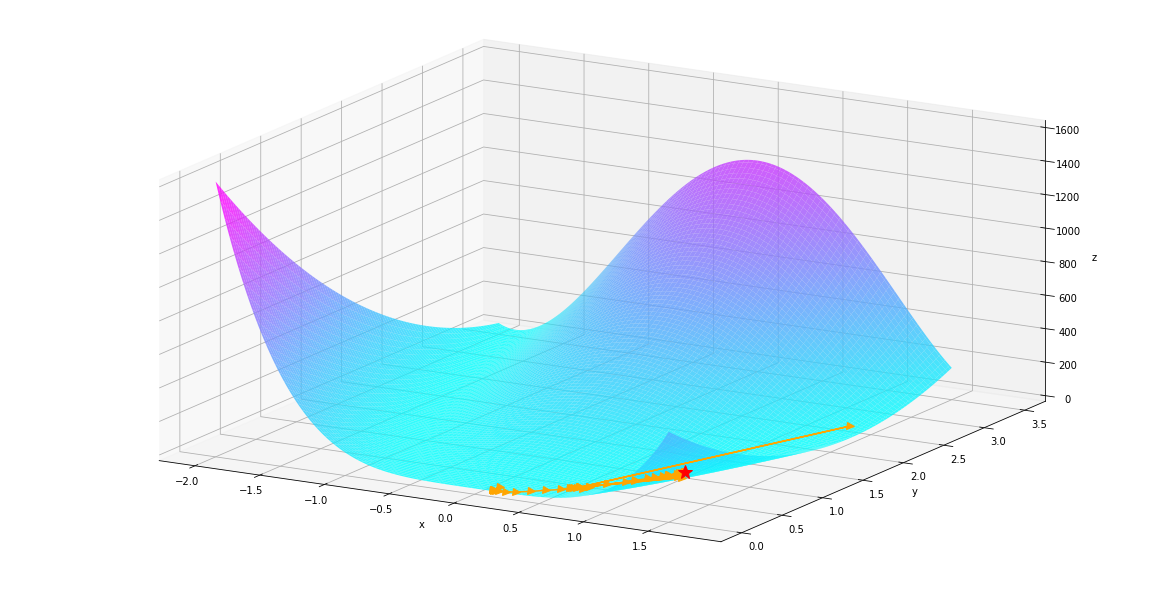

In [110]:
us, vs = hist_trim[:, 0].flatten(), hist_trim[:, 1].flatten()
zs     = f.evaluation_at({x: us, y: vs})
plt_surf(uu, vv, values, (us, vs, zs), show_dest=True, show_traj=True)

## `autodiff.plot`

Plot function takes in a single expression, which only has two subcomponent. It then use either Newton's Method or Gradient Descent to calculate the minimum of the given function. It plots the values of the function at different points in a contour map, with ranges specified by the user,and highlights the trajectory of the optimization algorithm reaching the minimum.

In [111]:
import autodiff.forward as fwd
import autodiff.optimize as opt
from autodiff.plot import plot_contour

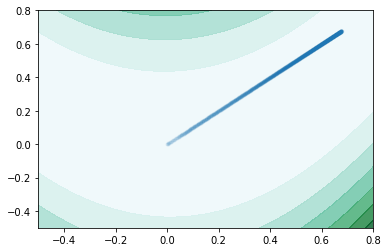

In [112]:
x, y = fwd.Variable(), fwd.Variable()
f = 100.0*(y - x**2)**2 + (1 - x)**2.0
init_val_dict = {x: 0.0, y: 1.0}
plot_contour(f,init_val_dict,x,y,plot_range=[-0.5,0.8],method = "gradient_descent")

We see that newton method merely used 2 iteration

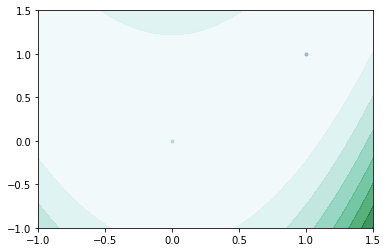

In [113]:
plot_contour(f,init_val_dict,x,y,plot_range=[-1,1.5],method = "newton")

## `autodiff.backprop`

In [134]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from autodiff.backprop import *
from autodiff.forward import *
from autodiff.rootfinding import *
import time

Backpropagation module is built upon the interfaces developed in central code file "Autodiff.forward".
It calculate the derivative of each nodes in the compuational graph with respect to the root nodes. Therefore with different root nodes, we should expect to see different values of derivative.
suppose we have the following structure:

$x = 1$, $y = 2$

$c = \sin(x)$

$d = c \cdot y$

Note: after one round of back propagation, the .bder attributes stores the answer from the last round until it is cleared when a new round is called upon.

In [135]:
x = Variable()
y = Variable()
c = sin(x)
d = c*y
back_propagation(c,{x:1,y:2})
print('derivative of x with respect to c is ', x.bder)
print('derivative of y with respect to c is ', y.bder)
back_propagation(d,{x:1,y:2})
print('derivative of x with respect to c is ', x.bder)
print('derivative of y with respect to c is ', y.bder)

derivative of x with respect to c is  0.540302305868
derivative of y with respect to c is  0
derivative of x with respect to c is  1.08060461174
derivative of y with respect to c is  0.841470984808


If we calculate by hand:

$
\begin{align}
\frac{dc}{dx} &= cos(1) = 0.54 \\
\frac{dc}{dy} &= 0 \\
\frac{dd}{dx} &= y*\frac{dc}{dx} = 2*cos(1) = 1.08\\
\frac{dd}{dy} &= c = sin(1) =  0.84 \\ 
\end{align}
$

Our Backward Mode is faster than Forward Mode when getting the derivatives of all nodes in a certain computational graph because of caching the results in the process. 

User can use our backward mode to make their own neural network

In [136]:
start1 = time.time()
x = Variable()
y = Variable()
c = sin(x)
d = cos(y)
e = sin(x)*cos(y)
f = tan(e)
for i in range(10000):
    back_propagation(f,{x:1,y:2})
end1 = time.time()
interval = end1-start1
print('derivative of x with respect to f is ', x.bder)
print('derivative of y with respect to f is ', y.bder)
print('derivative of c with respect to f is ', c.bder)
print('derivative of d with respect to f is ', d.bder)
print('derivative of e with respect to f is ', e.bder)
print('derivative of f with respect to f is ', f.bder)
print('derivative of g with respect to f is ', g.bder)
print('time taken is {} second'.format(interval))

derivative of x with respect to f is  -0.254837416116
derivative of y with respect to f is  -0.867211207612
derivative of c with respect to f is  0
derivative of d with respect to f is  0
derivative of e with respect to f is  1.1333910384
derivative of f with respect to f is  1
derivative of g with respect to f is  0
time taken is 0.43090200424194336 second


In [137]:
start2 = time.time()
for i in range(10000):
    forward_x = f.derivative_at(x,{x:1,y:2})
    forward_y = f.derivative_at(y,{x:1,y:2})
    forward_c = f.derivative_at(c,{x:1,y:2})
    forward_d = f.derivative_at(d,{x:1,y:2})
    forward_e = f.derivative_at(e,{x:1,y:2})
    forward_f = f.derivative_at(f,{x:1,y:2})
    forward_g = f.derivative_at(g,{x:1,y:2})
end2 = time.time()
interval = end2-start2
print('derivative of x with respect to f is ', forward_x)
print('derivative of y with respect to f is ', forward_y)
print('derivative of c with respect to f is ', forward_c)
print('derivative of d with respect to f is ', forward_d)
print('derivative of e with respect to f is ', forward_e)
print('derivative of f with respect to f is ', forward_f)
print('derivative of g with respect to f is ', forward_g)
print(interval)

derivative of x with respect to f is  -0.254837416116
derivative of y with respect to f is  -0.867211207612
derivative of c with respect to f is  -0.0
derivative of d with respect to f is  -0.0
derivative of e with respect to f is  1.1333910384
derivative of f with respect to f is  1.0
derivative of g with respect to f is  -0.0
0.8440079689025879


**Back propagation is also integrated with the function Newton's**

Note that sine function have multiple roots, and newton's method will only give you the first one it finds

In [142]:
result_d=newton_scalar(d,{x:1,y:-1},max_itr = 25,method = 'backward')

In [143]:
print('x:',result_d[x])
print('y:',result_d[y])
print('function value:',abs(d.evaluation_at({x:result_d[x],y:result_d[y]})))

x: 2.84112466652
y: -1.5707963268
function value: 5.91243550575e-13
